# Análise do Desempenho acadêmico

**Objetivo**: O objetivo dessa análise é verificar as chances de aprovação dos alunos, utilizando para este fim a classificação binária



---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000

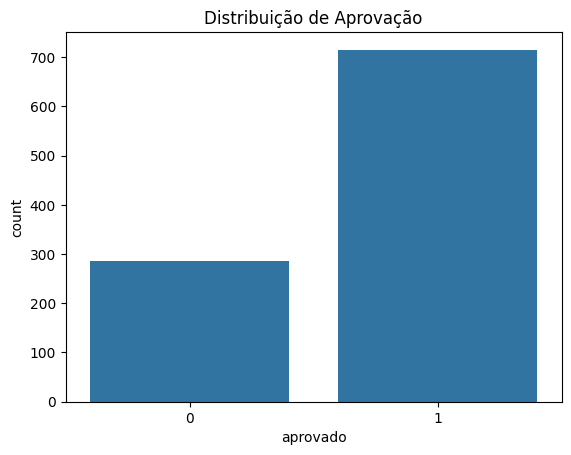

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.49      0.30      0.37        57
           1       0.76      0.87      0.81       143

    accuracy                           0.71       200
   macro avg       0.62      0.59      0.59       200
weighted avg       0.68      0.71      0.69       200



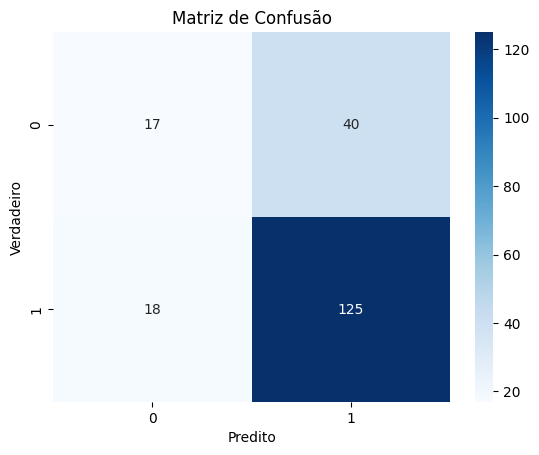

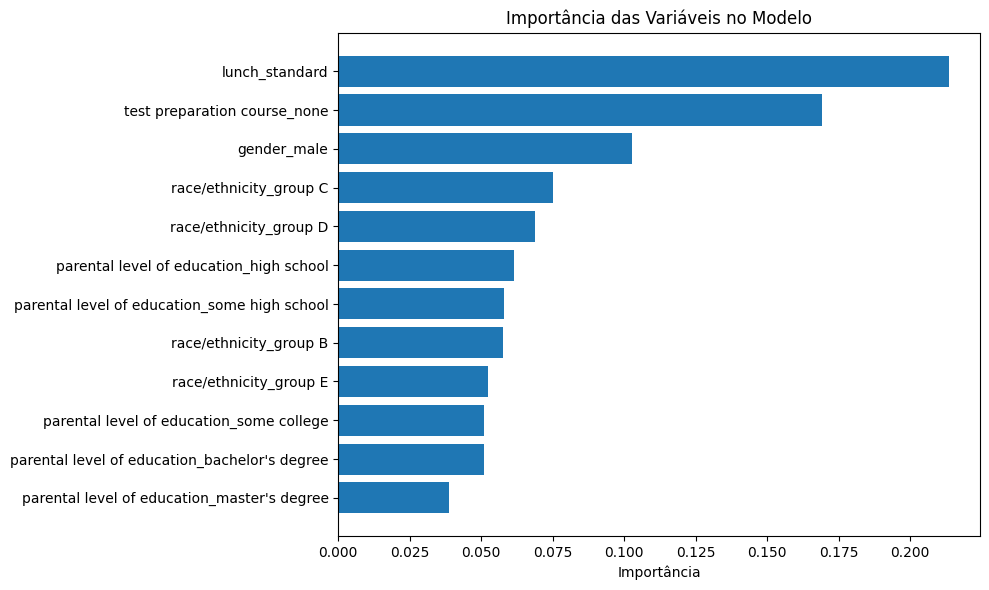

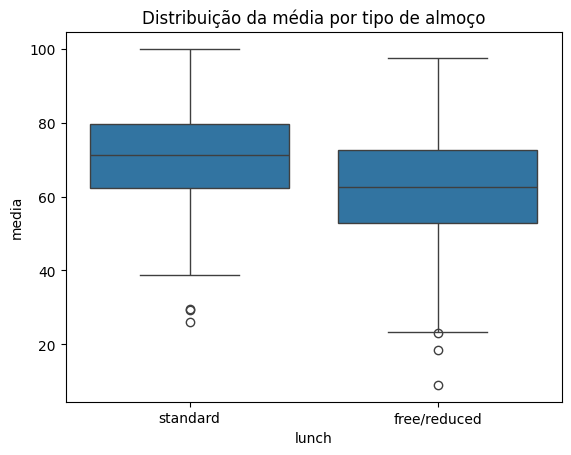

In [ ]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#carregando
df = pd.read_csv('StudentsPerformance.csv')
df.head()

print(df.info())
print(df.describe())


for col in df.columns:
    print(f"{col}: {df[col].unique()}")


df['media'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)


df['aprovado'] = (df['media'] >= 60).astype(int)


sns.countplot(x='aprovado', data=df)
plt.title('Distribuição de Aprovação')
plt.show()


df_model = df.drop(columns=['math score', 'reading score', 'writing score', 'media'])


X = pd.get_dummies(df_model.drop('aprovado', axis=1), drop_first=True)
y = df_model['aprovado']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


importances = model.feature_importances_
features = X.columns


feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.title("Importância das Variáveis no Modelo")
plt.xlabel("Importância")
plt.tight_layout()
plt.show()

df.groupby('lunch')['media'].mean()
sns.boxplot(x='lunch', y='media', data=df)
plt.title("Distribuição da média por tipo de almoço")
plt.show()

